# Loading the Dataset and Initial Exploration

In [ ]:
# Importing necessary libraries for data analysis and visualizatio
import pandas as pd # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for creating static, interactive, and animated visualizations
import seaborn as sns # Seaborn for statistical data visualization
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # NumPy for numerical operations

In [ ]:
# Setting up visualization style
sns.set(style="whitegrid")  # Setting the seaborn style for consistent and visually appealing plots


In [ ]:
# Loading the dataset
exoplanets_data = pd.read_csv('/content/exoplanets.csv')

# Displaying the first few rows of the dataset for a quick overview
exoplanets_data.head()

,planet_mass,planet_radius,orbital_period,orbital_radius,star_mass,star_radius,star_luminosity
0,8.590134,1.94544,0.736548,0.015439,1.015,0.98,3.310754
1,4.512760,1.57920,3.537960,0.043600,0.910,1.00,2.582873
2,36.864800,5.11952,8.463035,0.083050,0.500,0.75,1.508021
3,32.097800,3.13600,18.859014,0.141700,0.500,0.75,1.339036
4,146.188000,11.53600,3.487800,0.046000,0.990,1.71,2.893016


# Dataset Description and Visualizations

In [ ]:
# Overview of the dataset including the data types and non-null values
print("Dataset Information:")
print("---------------------")
exoplanets_data.info()

Dataset Information:
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   planet_mass      1013 non-null   float64
 1   planet_radius    1013 non-null   float64
 2   orbital_period   1013 non-null   float64
 3   orbital_radius   1013 non-null   float64
 4   star_mass        1013 non-null   float64
 5   star_radius      1013 non-null   float64
 6   star_luminosity  1013 non-null   float64
dtypes: float64(7)
memory usage: 55.5 KB


In [ ]:
# Basic dataset description (size, variables)
print("Total Rows:", exoplanets_data.shape[0])
print("Total Columns:", exoplanets_data.shape[1])
print("Column Names:", exoplanets_data.columns.tolist())

Total Rows: 1013
Total Columns: 7
Column Names: ['planet_mass', 'planet_radius', 'orbital_period', 'orbital_radius', 'star_mass', 'star_radius', 'star_luminosity']


In [ ]:
# Generating Statistical Summary of the data i.e. Count, mean, std, min/max etc.
print("\nStatistical Summary of the Data:")
print("--------------------------------")
exoplanets_data.describe()


Statistical Summary of the Data:
--------------------------------


,planet_mass,planet_radius,orbital_period,orbital_radius,star_mass,star_radius,star_luminosity
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,343.563980,9.033790,18.851294,0.101647,0.992595,1.125280,3.206746
std,811.766416,5.612988,65.343955,0.162509,0.265571,0.497601,1.113675
min,0.889840,0.884800,0.719573,0.015260,0.330000,0.328000,1.020237
25%,10.900540,2.817920,3.118601,0.041010,0.830000,0.794000,2.434663
50%,133.476000,10.673600,4.542169,0.054900,1.000000,1.038000,3.145093
75%,349.580000,13.596800,11.024540,0.096000,1.180000,1.390000,3.902029
max,11440.800000,20.888000,1071.232280,1.890000,1.720000,4.230000,6.365151


In [ ]:
# Displaying the number of unique values in each column
print("\nUnique Values in Each Column:")
print("------------------------------")
for column in exoplanets_data.columns:
    print(f"{column}: {exoplanets_data[column].nunique()} unique values")


Unique Values in Each Column:
------------------------------
planet_mass: 778 unique values
planet_radius: 691 unique values
orbital_period: 1013 unique values
orbital_radius: 810 unique values
star_mass: 396 unique values
star_radius: 494 unique values
star_luminosity: 1013 unique values


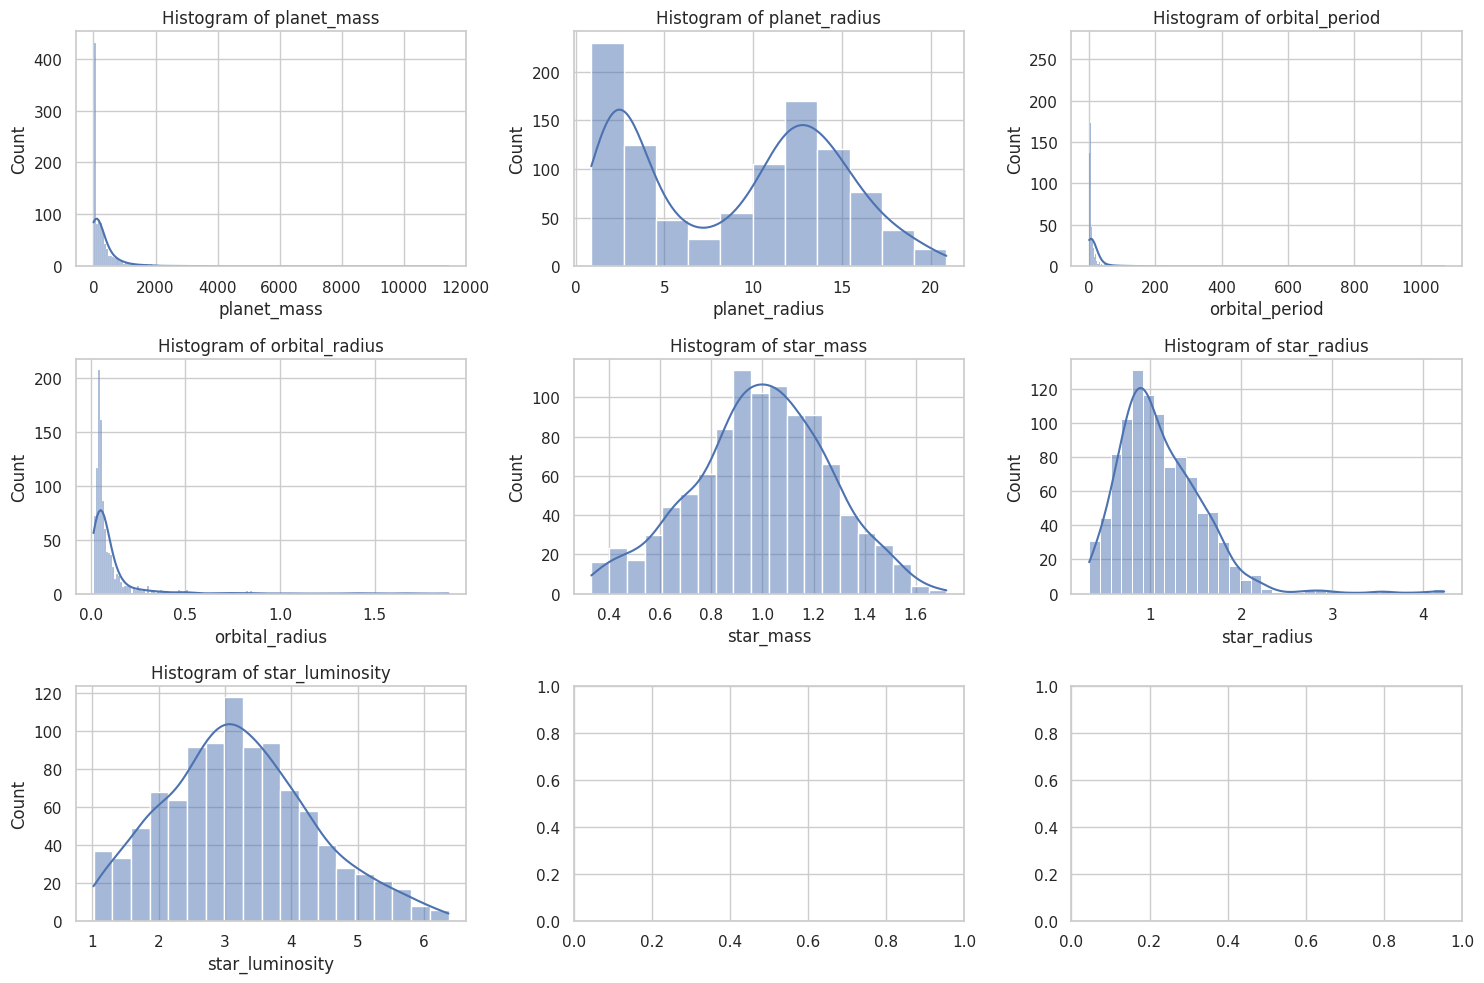

In [ ]:
# Histograms for each quantitative variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(exoplanets_data.columns):
    sns.histplot(exoplanets_data[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

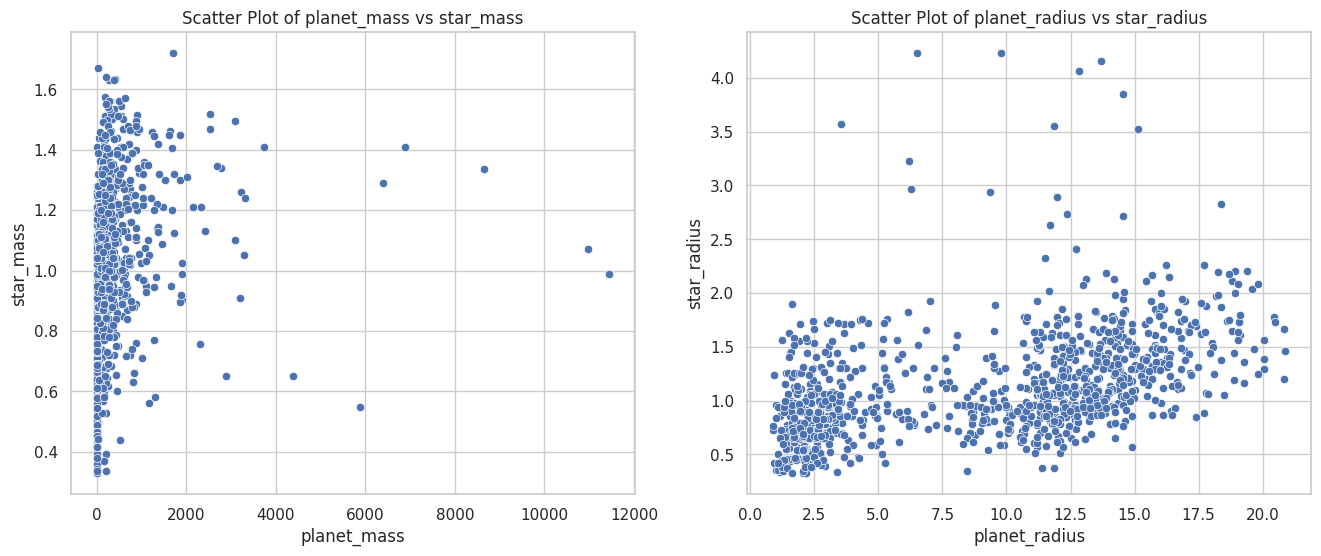

In [ ]:
important_pairs = [('planet_mass', 'star_mass'), ('planet_radius', 'star_radius')]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
for i, (x, y) in enumerate(important_pairs):
    ax = axes[i]
    sns.scatterplot(data=exoplanets_data, x=x, y=y, ax=ax)
    ax.set_title(f"Scatter Plot of {x} vs {y}")
    ax.set_xlabel(x)
    ax.set_ylabel(y)
plt.show()

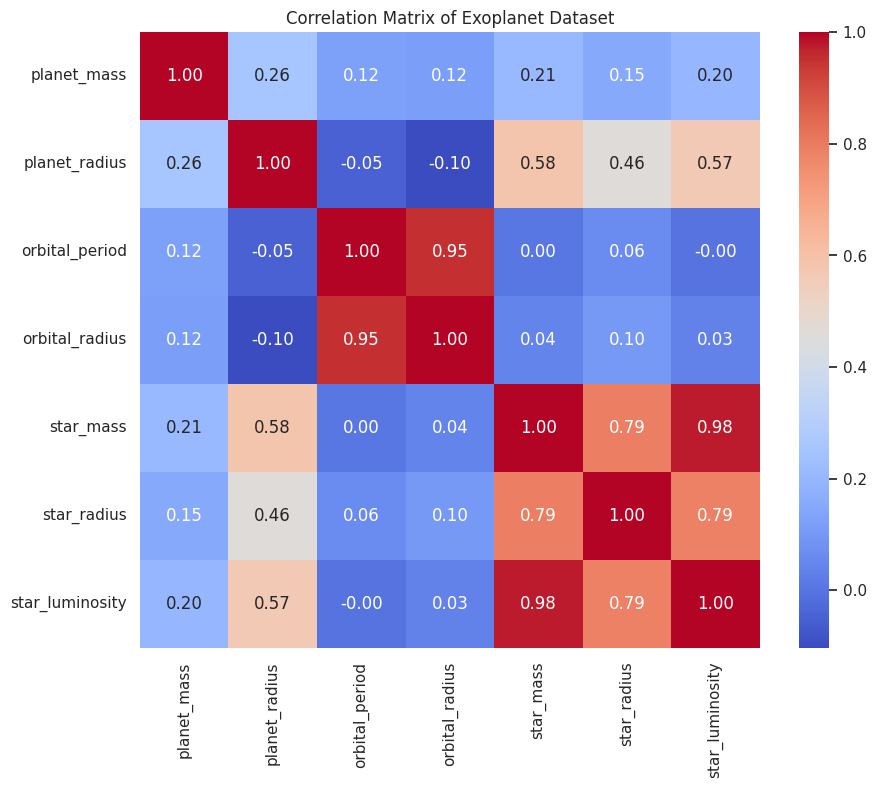

In [ ]:
# Calculate the correlation matrix
correlation_matrix = exoplanets_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Exoplanet Dataset")
plt.show()


# Habitable Zone Analysis

In [ ]:
# Define a function to check if a planet is in the habitable zone
def is_habitable(orbital_radius, star_luminosity):
    lower_bound = 0.8 * star_luminosity
    upper_bound = 2.0 * star_luminosity
    return lower_bound <= orbital_radius <= upper_bound

# Apply the function to each row in the dataset
exoplanets_data['is_habitable'] = exoplanets_data.apply(
    lambda row: is_habitable(row['orbital_radius'], row['star_luminosity']), axis=1
)

# Count the number of habitable planets
num_habitable_planets = exoplanets_data['is_habitable'].sum()
print("Number of Habitable Planets:", num_habitable_planets)


Number of Habitable Planets: 2


In [ ]:
# Identify the rows corresponding to habitable planets
habitable_planets = exoplanets_data[exoplanets_data['is_habitable']]

# Display information about these habitable planets
print(habitable_planets)

     planet_mass  planet_radius  orbital_period  orbital_radius  star_mass  \
60      56.26649        8.77296       748.30000            1.43       0.65   
427   1271.20000       10.14720      1071.23228            1.89       0.77   

     star_radius  star_luminosity  is_habitable  
60          0.68         1.631006          True  
427         0.73         2.031880          True  


# Regression Analysis



1.   Hypothesis 1 (Planet Radius and Star Luminosity)

In [ ]:
# Preparing data for regression
X = exoplanets_data[['star_luminosity']]
y = exoplanets_data['planet_radius']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Printing the results
print("Regression Analysis for Planet Mass and Star Mass")
print("------------------------------------------------")
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Intercept:", model.intercept_)
print("Coefficient for Star Mass:", model.coef_[0])


Regression Analysis for Planet Mass and Star Mass
------------------------------------------------
Root Mean Squared Error (RMSE): 4.767053615908868
R-squared (R²): 0.27413825281035964
Intercept: -0.16414568041296818
Coefficient for Star Mass: 2.898557720047905


2.   Hypothesis 2 (Planet Mass and Star Mass)

In [ ]:

# Prepare the data
X2 = exoplanets_data[['star_mass']]  # Predictor variable
y2 = exoplanets_data['planet_mass']  # Response variable

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Predict on the test set
y2_pred = model2.predict(X2_test)

# Evaluation metrics
rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
r22 = r2_score(y2_test, y2_pred)

# Print the results
print("Regression Analysis for Planet Mass and Star Mass")
print("------------------------------------------------")
print("Root Mean Squared Error (RMSE):", rmse2)
print("R-squared (R²):", r22)
print("Intercept:", model2.intercept_)
print("Coefficient for Star Mass:", model2.coef_[0])


Regression Analysis for Planet Mass and Star Mass
------------------------------------------------
Root Mean Squared Error (RMSE): 904.4866131035507
R-squared (R²): 0.05613982641275306
Intercept: -234.89573069590688
Coefficient for Star Mass: 575.456749377623


3.   Hypothesis 3 (Orbital Period and Star Radius)

In [ ]:
# Prepare the data
X2 = exoplanets_data[['star_mass']]  # Predictor variable
y2 = exoplanets_data['planet_mass']  # Response variable

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Predict on the test set
y2_pred = model2.predict(X2_test)

# Evaluation metrics
rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
r22 = r2_score(y2_test, y2_pred)

# Print the results
print("Regression Analysis for Planet Mass and Star Mass")
print("------------------------------------------------")
print("Root Mean Squared Error (RMSE):", rmse2)
print("R-squared (R²):", r22)
print("Intercept:", model2.intercept_)
print("Coefficient for Star Mass:", model2.coef_[0])

Regression Analysis for Planet Mass and Star Mass
------------------------------------------------
Root Mean Squared Error (RMSE): 904.4866131035507
R-squared (R²): 0.05613982641275306
Intercept: -234.89573069590688
Coefficient for Star Mass: 575.456749377623
